1.  Load the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('C:\\Users\\sande\\Desktop\\h20\\AIML\\Residency-3\\Project4_ensemble\\parkinsons.csv')

In [4]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
data.head(5).T

,0,1,2,3,4
name,phon_R01_S01_1,phon_R01_S01_2,phon_R01_S01_3,phon_R01_S01_4,phon_R01_S01_5
MDVP:Fo(Hz),119.992,122.4,116.682,116.676,116.014
MDVP:Fhi(Hz),157.302,148.65,131.111,137.871,141.781
MDVP:Flo(Hz),74.997,113.819,111.555,111.366,110.655
MDVP:Jitter(%),0.00784,0.00968,0.0105,0.00997,0.01284
MDVP:Jitter(Abs),7e-05,8e-05,9e-05,9e-05,0.00011
MDVP:RAP,0.0037,0.00465,0.00544,0.00502,0.00655
MDVP:PPQ,0.00554,0.00696,0.00781,0.00698,0.00908
Jitter:DDP,0.01109,0.01394,0.01633,0.01505,0.01966
MDVP:Shimmer,0.04374,0.06134,0.05233,0.05492,0.06425


2.  It is always a good practice to eye-ball raw data to get a feel of the data in terms of  number of structure of the file, number of attributes, types of attributes and a general  idea of likely challenges in the dataset. 

1) We can observe that the above features are vocal features to describe the voice. 
2) We can also observe that few features have very low magnitude in comparision.
3) One challenge in analysing the data is to handle the redundant features example, Shimmer:APQ3 and Shimmer: APQ5
        are very similar as both describe the amplitude.
4) spread1 is having negative values.


3. Using univariate & bivariate analysis to check the individual attributes for their basic  statistic such as central values, spread, tails etc. What are your observations? 

In [5]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


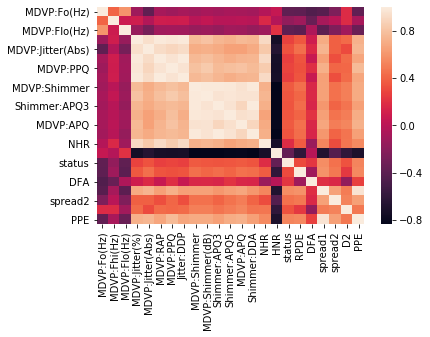

In [7]:
sns.heatmap(data.corr())

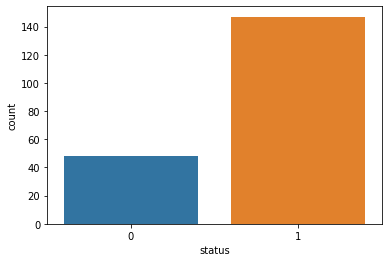

In [8]:
sns.countplot(data['status'])

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

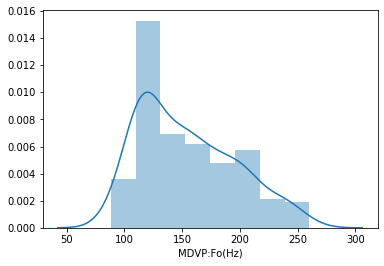

In [10]:
sns.distplot(data['MDVP:Fo(Hz)']) 

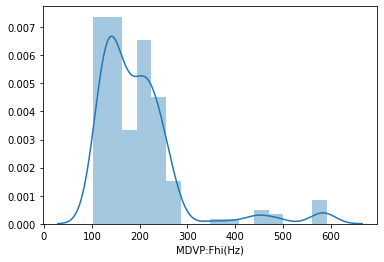

In [31]:
sns.distplot(data['MDVP:Fhi(Hz)']) 

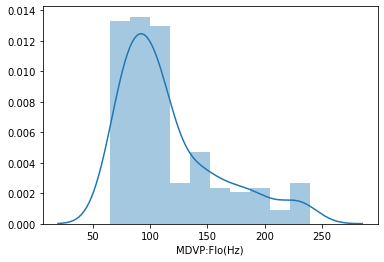

In [32]:
sns.distplot(data['MDVP:Flo(Hz)']) 

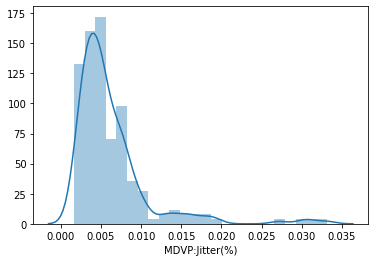

In [33]:
sns.distplot(data['MDVP:Jitter(%)'])

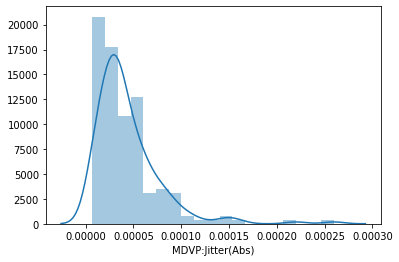

In [35]:
sns.distplot(data['MDVP:Jitter(Abs)'])

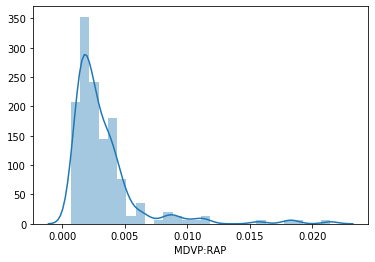

In [37]:
sns.distplot(data['MDVP:RAP'])

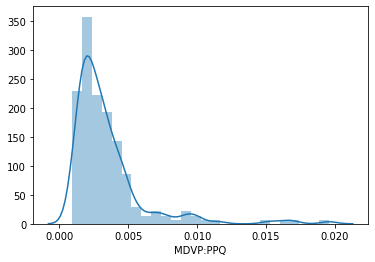

In [38]:
sns.distplot(data['MDVP:PPQ'])

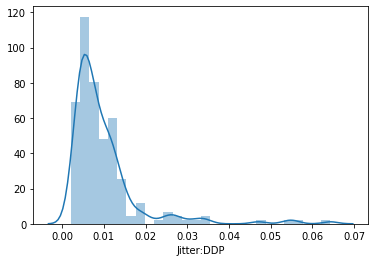

In [39]:
sns.distplot(data['Jitter:DDP'])

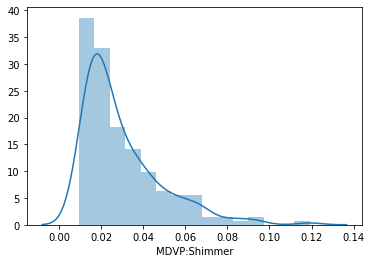

In [40]:
sns.distplot(data['MDVP:Shimmer'])

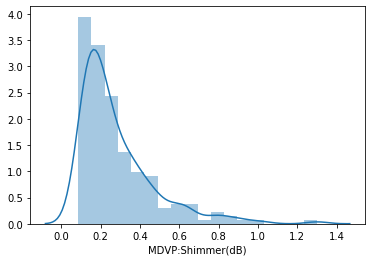

In [41]:
sns.distplot(data['MDVP:Shimmer(dB)'])

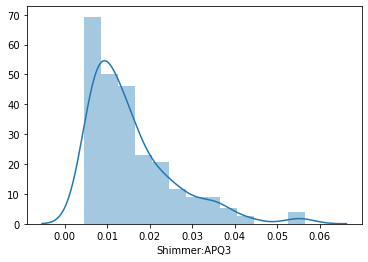

In [42]:
sns.distplot(data['Shimmer:APQ3'])

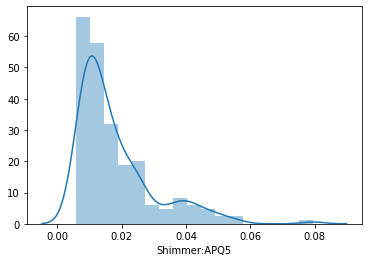

In [43]:
sns.distplot(data['Shimmer:APQ5'])

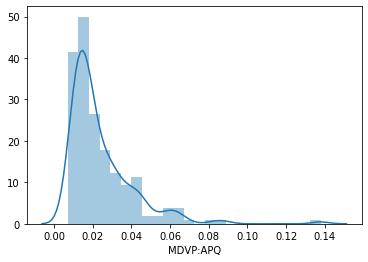

In [44]:
sns.distplot(data['MDVP:APQ'])

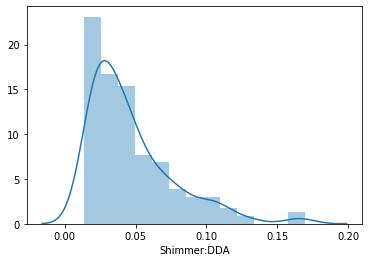

In [45]:
sns.distplot(data['Shimmer:DDA'])

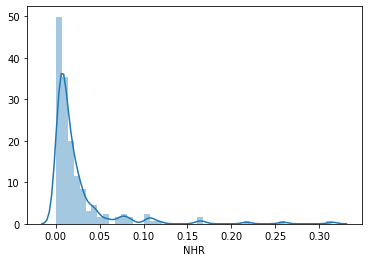

In [46]:
sns.distplot(data['NHR'])

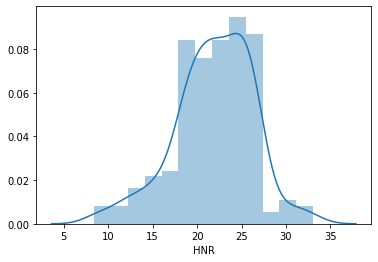

In [47]:
sns.distplot(data['HNR'])

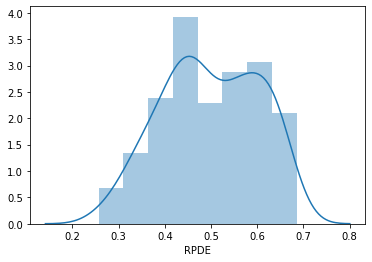

In [48]:
sns.distplot(data['RPDE'])

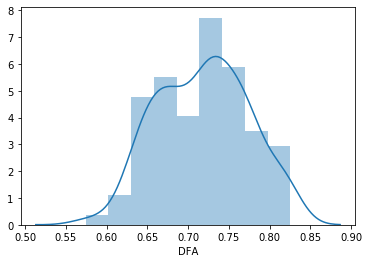

In [49]:
sns.distplot(data['DFA'])

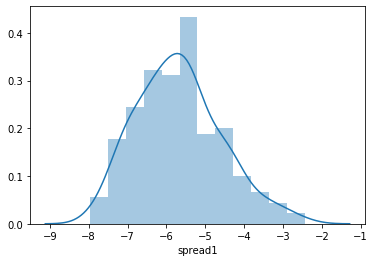

In [50]:
sns.distplot(data['spread1'])

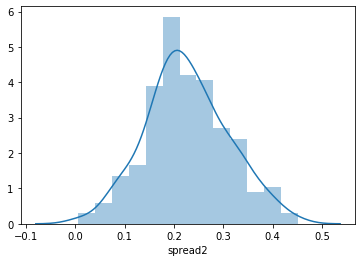

In [51]:
sns.distplot(data['spread2'])

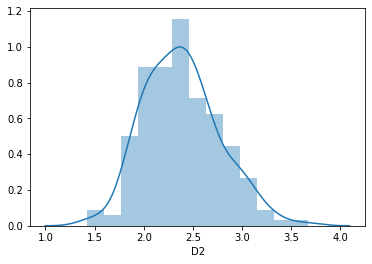

In [52]:
sns.distplot(data['D2'])

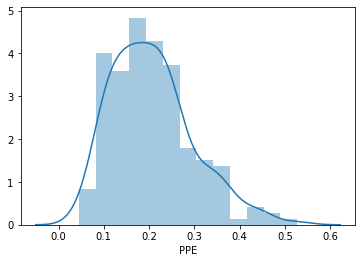

In [53]:
sns.distplot(data['PPE'])

In [13]:
# We are using IsolationForest for Outlier Analysis
from sklearn.ensemble import IsolationForest
clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data.iloc[:,1:])
data['anomaly']=preds
print(data['anomaly'].value_counts())

 1    162
-1     33
Name: anomaly, dtype: int64


 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [14]:
#Normalizing the data
from scipy.stats import zscore
data_ind = data.drop(labels= ["status","name"] , axis = 1)
data_z = data_ind.apply(zscore)
print(data_z.head(5))
X = data_z
X.shape

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1   spread2

(195, 23)

In [15]:
data_out = data['status']
y = data_out
y.shape

(195,)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

5.  Create the model using “entropy” method of reducing the entropy and fit it to training  data.

In [17]:
from sklearn.tree import DecisionTreeClassifier
dte_model = DecisionTreeClassifier(criterion = 'entropy')
dte_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dte_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.040734
HNR               0.000000
RPDE              0.000000
DFA               0.079409
spread1           0.000000
spread2           0.000000
D2                0.067644
PPE               0.387263
anomaly           0.000000


6. Test the model on test data and what is the accuracy achieved. Capture the predicted  values and do a crosstab.

In [19]:
y_predict = dte_model.predict(X_test)
print(dte_model.score(X_train , y_train))
print(dte_model.score(X_test , y_test))

1.0
0.8983050847457628


In [20]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[14  5]
 [ 1 39]]


7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model.  What is the impact on the model accuracy? How does regularization help?

In [51]:
reg_dte_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5)
reg_dte_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
y_predict = reg_dte_model.predict(X_test)
print(reg_dte_model.score(X_train, y_train))
print(reg_dte_model.score(X_test , y_test))

0.9705882352941176
0.8983050847457628


In [25]:
print(metrics.confusion_matrix(y_test, y_predict))

[[16  3]
 [ 2 38]]


Regularization helps to avoid Overfitting of the model. We can perfrom regularization by changing the values of Max_depth and min_samples_split values in the decision tree, which makes the model more generic and helps to adapt to real world noise in a better way

8.  Next implement the decision tree using Random Forest. What is the optimal number of  trees that gives the best result

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 90)
rf = rfcl.fit(X_train, y_train)

In [121]:
y_predict = rf.predict(X_test)
print(rf.score(X_train , y_train))
print(rf.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

1.0
0.8135593220338984
[[ 9 10]
 [ 1 39]]
